# Ornstein-Uhlenbeck Processes

## Brownian Motion

### Velocity Process

We will take the Lagevin equation and solve it both analytically and numerically. 

$$ \newcommand{\f}[2]{\frac{#1}{#2}}
\newcommand{\mean}[1]{\langle #1 \rangle}
$$

The change in velocity process involves a deterministic drag piece and a stochastic force piece

$$ V(t+dt)= V(t) - \gamma V(t) dt + \beta dW_t $$

This is written in the SDE language as
$$ dV(t) = - \gamma V(t) dt + \beta dW_t~.$$


Using standard techniques this can be solved to give
$$ V(t)  = v_0 e^{-\gamma t} + \beta e^{-\gamma t} \int_0^t e^{\gamma t'} dW_{t'}$$ 
as can be verified by direct substitution. 



However this form is not particularly illuminating. Instead we observe that at every instant we add an independent normal to the velocity and thus the velocity will be given by a normal distribution. Since the normal distribution is completely determinded by its first two moments we only need to evaluate those. Taking an expectation value of both sides of the SDE we get the ODE

$$ \begin{eqnarray}
d \mean{V(t)} &=& - \gamma \mean{V(t)} dt
\end{eqnarray}
$$

The solution to this ODE is

$$ \mean{V(t)} = v_0 e^{-\gamma t}$$.

Now we look for the variance. We use Ito's rule to get the SDE
$$
\begin{eqnarray}
dV^2(t) &=& 2 V(t) dV(t) + {dV(t)}^2 \\
&=& (-2 \gamma V(t)^2 + \beta^2) dt + 2 V(t) \beta dW_t
\end{eqnarray}
$$

Taking the expectation value of this SDE we get the ODE

$$\begin{eqnarray}
d \mean{V^2(t)} &=& (\beta^2-2 \gamma \mean{V^2(t)}) dt
\end{eqnarray}
$$

The solution to this ODE consistent with the initial condition $V(0)=v_0$ is
$$
\mean{V^2(t)}= v_0^2 e^{-2 \gamma t} +  \f{\beta^2}{2 \gamma} (1- e^{-2 \gamma t})
$$

Therefore we get
$$
var(V(t))=\f{\beta^2}{2 \gamma} (1- e^{-2 \gamma t})
$$

This finally gives

$$
V(t) = \mathcal N \Big( v_0 e^{-\gamma t}, \sqrt{ \f{\beta^2}{2 \gamma} (1- e^{-2 \gamma t})}\Big)
$$


### Position Process

The SDE for position is given by

$$
dX(t)= V(t) dt
$$
and using Ito's rule we get
$$
\begin{eqnarray}
dX^2(t)&=&2 X(t) dX(t) + d X(t)^2 \\
&=& 2 X(t) V(t) dt
\end{eqnarray}
$$
and
$$
\begin{eqnarray}
d(XV(t)) &=& V(t) dX(t) + X(t) dV(t) + dX(t) dV(t) \\
&=& (V^2(t) - X(t) V(t))dt + \beta X(t) dW_t
\end{eqnarray}
$$

Taking the expectation values of these we get the ODEs
$$ 
\begin{eqnarray}
d\mean{X(t)} &=& \mean{V(t)} dt = v_0 e^{-\gamma t} \\
d\mean{X^2(t)} &=& 2 \mean{X(t) V(t)} dt  \\
d \mean{XV(t)} &=& - \gamma \mean{XV(t)} dt + \mean{V^2(t)} dt
\end{eqnarray}
$$
The first can be solved to
$$
\mean{X(t)} = x_0 + \f{v_0}{\gamma} (1- e^{-\gamma t})
$$
For the others we massage them to get
$$
\begin{eqnarray}
\f{d var(X(t))}{dt} &=&  \f{d \mean{X^2(t)}}{dt}  - 2 \mean{X(t)} \f{d \mean{X(t)}}{dt} \\
&=& 2 cov(X(t), V(t))
\end{eqnarray}$$
and
$$
\begin{eqnarray}
\f{d cov(X(t),V(t))}{dt} &=&  \f{d \mean{X(t) V(t)}}{dt}  -  \mean{X(t)} \f{d \mean{V(t)}}{dt}-\mean{V(t)} \f{d \mean{X(t)}}{dt} \\
&=& \mean{V^2(t)} - \gamma \mean{X(t) V(t)}+ \gamma \mean{X(t)} \mean{V(t)} -\mean{V(t)}^2 \\
&=& var(V(t)) - \gamma cov(X(t),V(t))
\end{eqnarray}$$

Therefore we get
$$
cov(X(t) V(t)) = \f{\beta^2}{2 \gamma^2}(1- 2 e^{-\gamma t}+ e^{-2 \gamma t})~,
$$
and 
$$
var(X(t)) = \f{\beta^2}{\gamma^2} \left[ t - \f{2}{\gamma}(1- e^{-\gamma t}) + \f{1}{2 \gamma} (1- e^{-2 \gamma t}) \right]
$$

Thus collecting all the results
$$
X(t) =  \mathcal N \Big( x_0 + \f{v_0}{\gamma} (1- e^{-\gamma t}),  \f{\beta}{\gamma} \sqrt{  t - \f{2}{\gamma}(1- e^{-\gamma t}) + \f{1}{2 \gamma} (1- e^{-2 \gamma t})}\Big)
$$


## Plots of Analytical Expressions

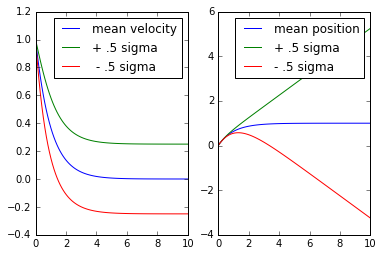

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline


beta=1.0
gamma=1.0
v0=1.0
x0=0.0
t=np.linspace(0,10,100)
var_vel=(beta**2/(2 * gamma))* (1- np.exp(-2*gamma*t))
var_pos=(beta/gamma)**2*(t-2/gamma*(1-np.exp(-gamma*t))+1/(2*gamma)*(1-np.exp(-2*gamma*t)))



'''
plt.plot(t,var)
plt.xlabel("t")
plt.ylabel("var V(t)")
plt.show()

plt.clf()

plt.plot(t,var)
plt.xlabel("t")
plt.ylabel("var X(t)")
plt.show()

plt.clf()
'''

vmean=v0*np.exp(-gamma*t)
vup=vmean+.5*var_vel
vdown=vmean-.5*var_vel
plt.subplot(121)
plt.plot(t,vmean,label="mean velocity")
plt.plot(t,vup,label="+ .5 sigma")
plt.plot(t,vdown,label=" - .5 sigma")
plt.legend()


plt.subplot(122)
xmean=x0+v0/gamma*(1- np.exp(-gamma*t))
xup=xmean+.5*var
xdown=xmean-.5*var
plt.plot(t,xmean,label="mean position")
plt.plot(t,xup,label="+ .5 sigma")
plt.plot(t,xdown,label="- .5 sigma")
plt.legend()
